In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. General Information About the Data

In [14]:
import pandas as pd

# Correct path (assuming your file is in same folder as .ipynb)
df = pd.read_csv("College_Data.csv", index_col=0)
df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


The data contains 18 variables which are explained as follows:
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

* The data contain 777 rows and 18 columns or variables

In [19]:
df.describe(include="all")

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


* Above we can see the overall statistical information about the variables

# 2. Explanatory Data Analysis:

In [21]:
# Only select numeric columns for correlation
df.corr(numeric_only=True)

# Here we see the correlation between numeric variables only.

#Here we see the correlation between variables.

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


*Below in the heatmap, we will visualize all of the correlations with r of the data

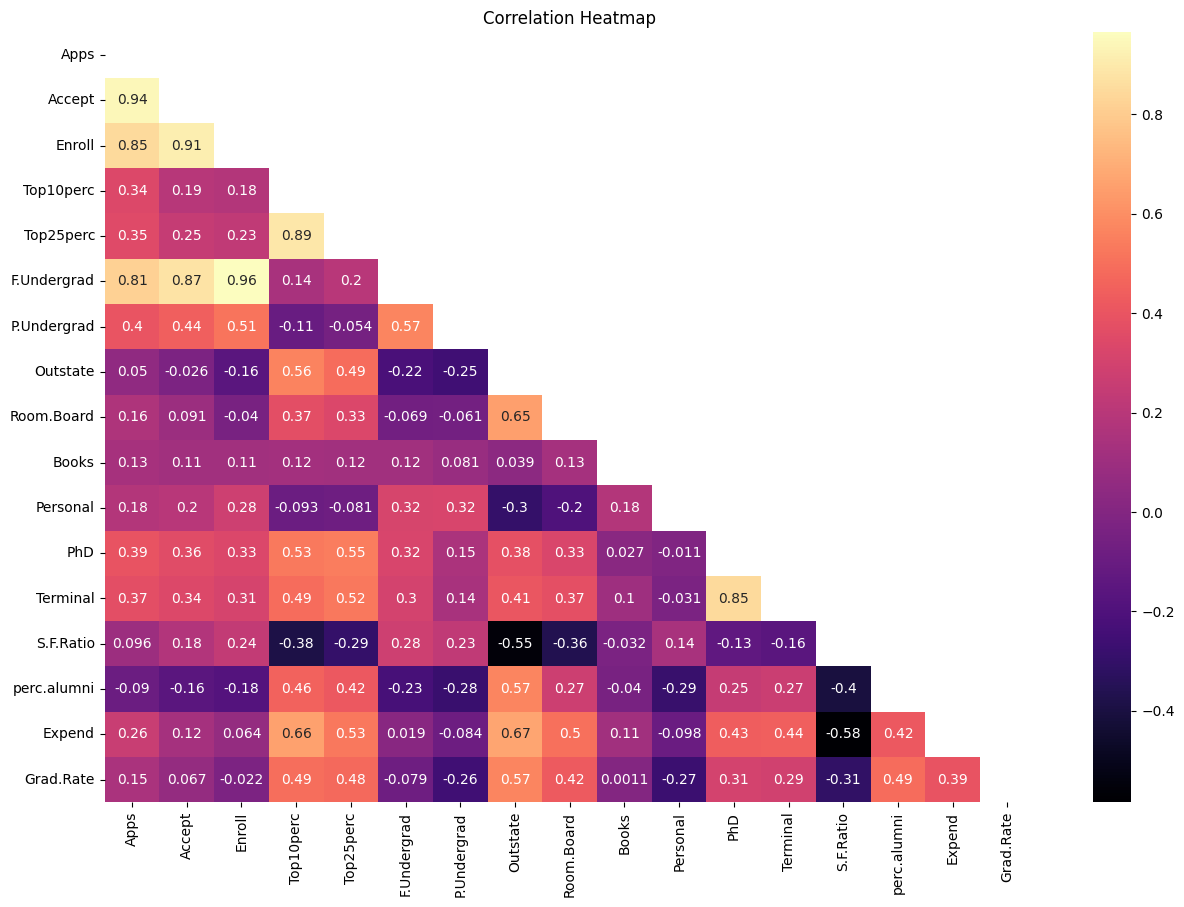

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure df is defined:
df = pd.read_csv('College_Data.csv')  # Replace with actual filename

# Only numeric columns for correlation
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))

# Create upper triangle mask
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
sns.heatmap(df_corr, cmap="magma", annot=True, linewidths=0, linecolor='white', cbar=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show()


*Below we will separate the correlation of variables according the university is a private or state university

<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\ITs\AppData\Local\Temp\ipykernel_10832\1991390122.py:7: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\FlutterAIBackend\College_Data.csv")


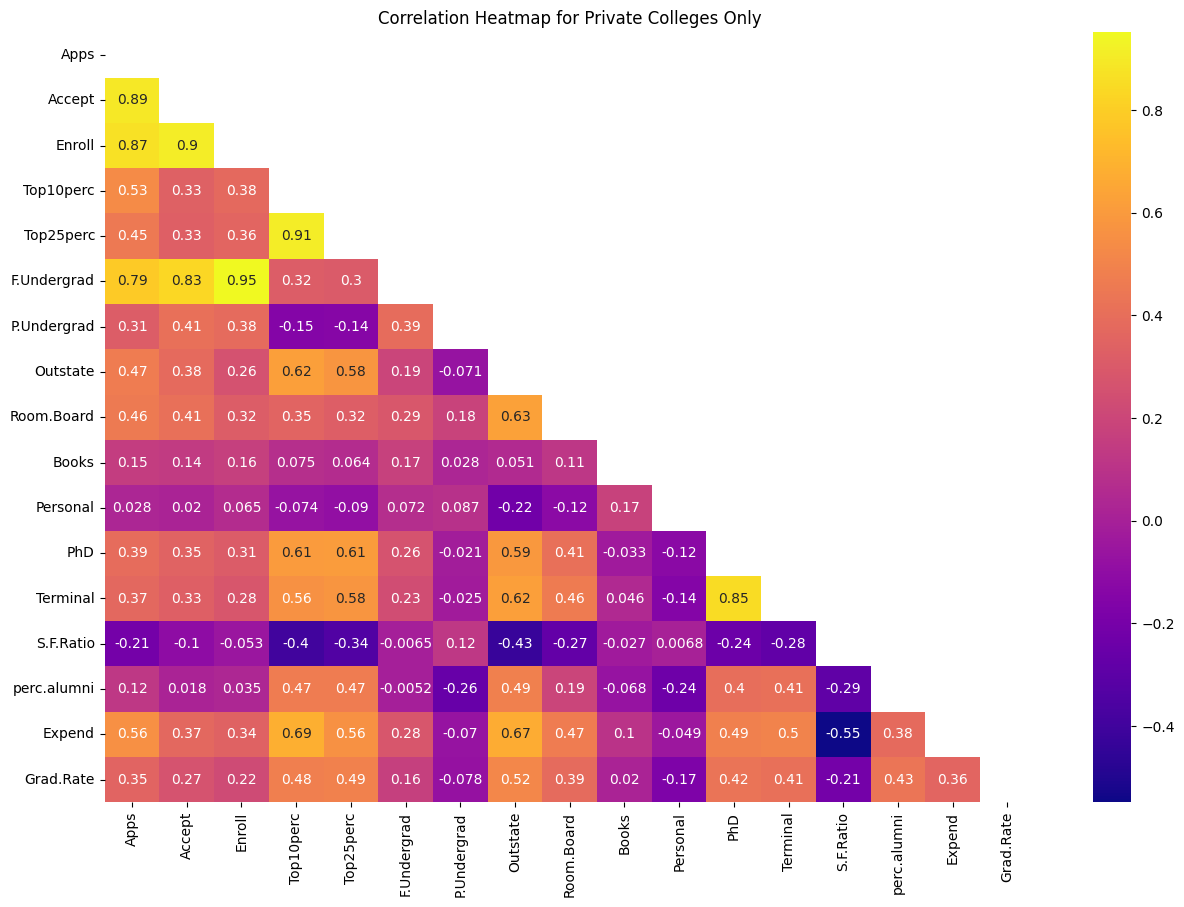

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset again (replace the path with your actual file if needed)
df = pd.read_csv("D:\FlutterAIBackend\College_Data.csv")

 # ✔️ This loads the CSV file

# Step 2: Drop 'Unnamed: 0' if it exists (common issue in this dataset)
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Step 3: Convert 'Private' column to category if needed (optional)
df['Private'] = df['Private'].astype('category')

# Step 4: Create a heatmap for only "Private = Yes"
plt.figure(figsize=(15,10))
mask = np.zeros_like(df.drop(['Private'], axis=1).corr(), dtype=bool)  # ✅ Use bool instead of np.bool (which is deprecated)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[df["Private"]== "Yes"].drop(['Private'], axis=1).corr(),
            cmap="plasma", annot=True, linewidths=0, 
            linecolor='white', cbar=True, mask=mask)
plt.title("Correlation Heatmap for Private Colleges Only")
plt.show()


* In the heatmap above we only see the correlations of variables for private universities

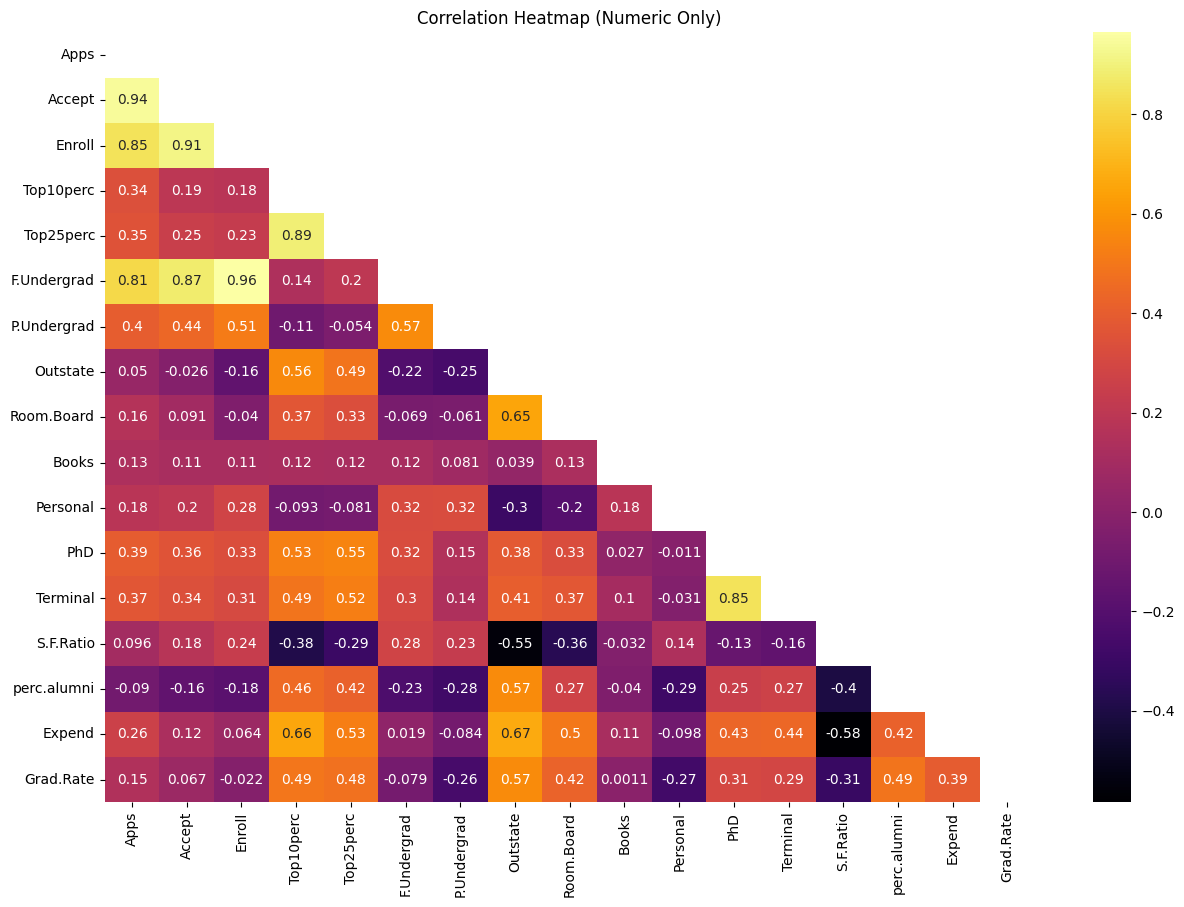

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data — set index_col=0 to make college names index (not column)
df = pd.read_csv("D:/FlutterAIBackend/College_Data.csv", index_col=0)

# Drop non-numeric columns (like 'Private')
df_numeric = df.select_dtypes(include=[np.number])  # keep only numeric columns

# Create a mask for the upper triangle
mask = np.zeros_like(df_numeric.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), 
            cmap="inferno", 
            annot=True, 
            linewidths=0, 
            linecolor='white', 
            cbar=True, 
            mask=mask)
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()



* In the heatmap above we only see the correlations of variables for state universities

* Now we will evaluate and visualize variable for private and state universities in the same plots in order to get better insights and compare them
*First we will create a scatterplot of Grad.Rate(Graduation rate) versus Room.Board(Room and Board Costs) where the points are colored by the Private column

<Axes: xlabel='Grad.Rate', ylabel='Room.Board'>

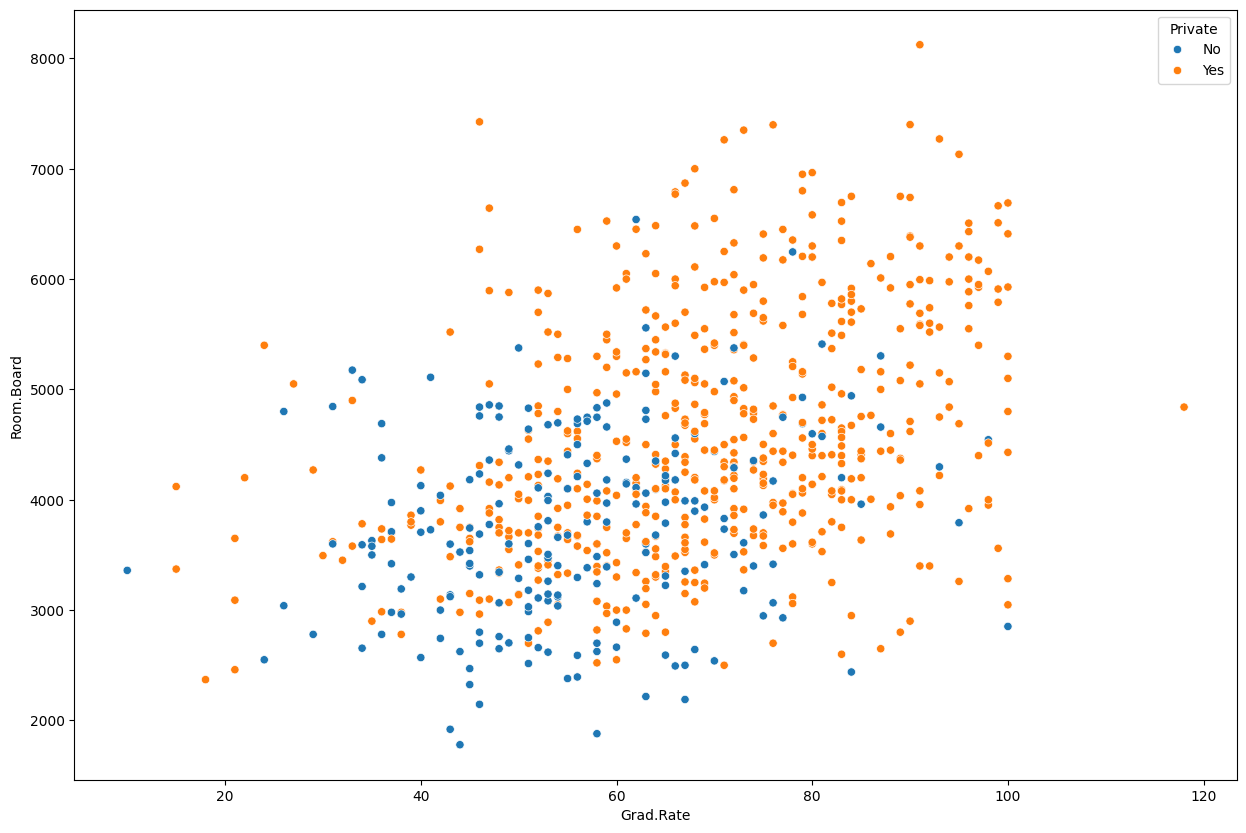

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Grad.Rate", y="Room.Board",data=df,hue="Private")

*There is a correlation between graduation rate and room costs, but not strong(0.424942) as seen in the table below.

* In private universities, there is higher correlation than the state universities(0.39 versus 0.22 as seen in the heatmaps)

* Below we will create a scatterplot of F.Undergrad( Number of fulltime undergraduates) versus Outstate(Out-of-state tuition) where the points are colored by the Private column.

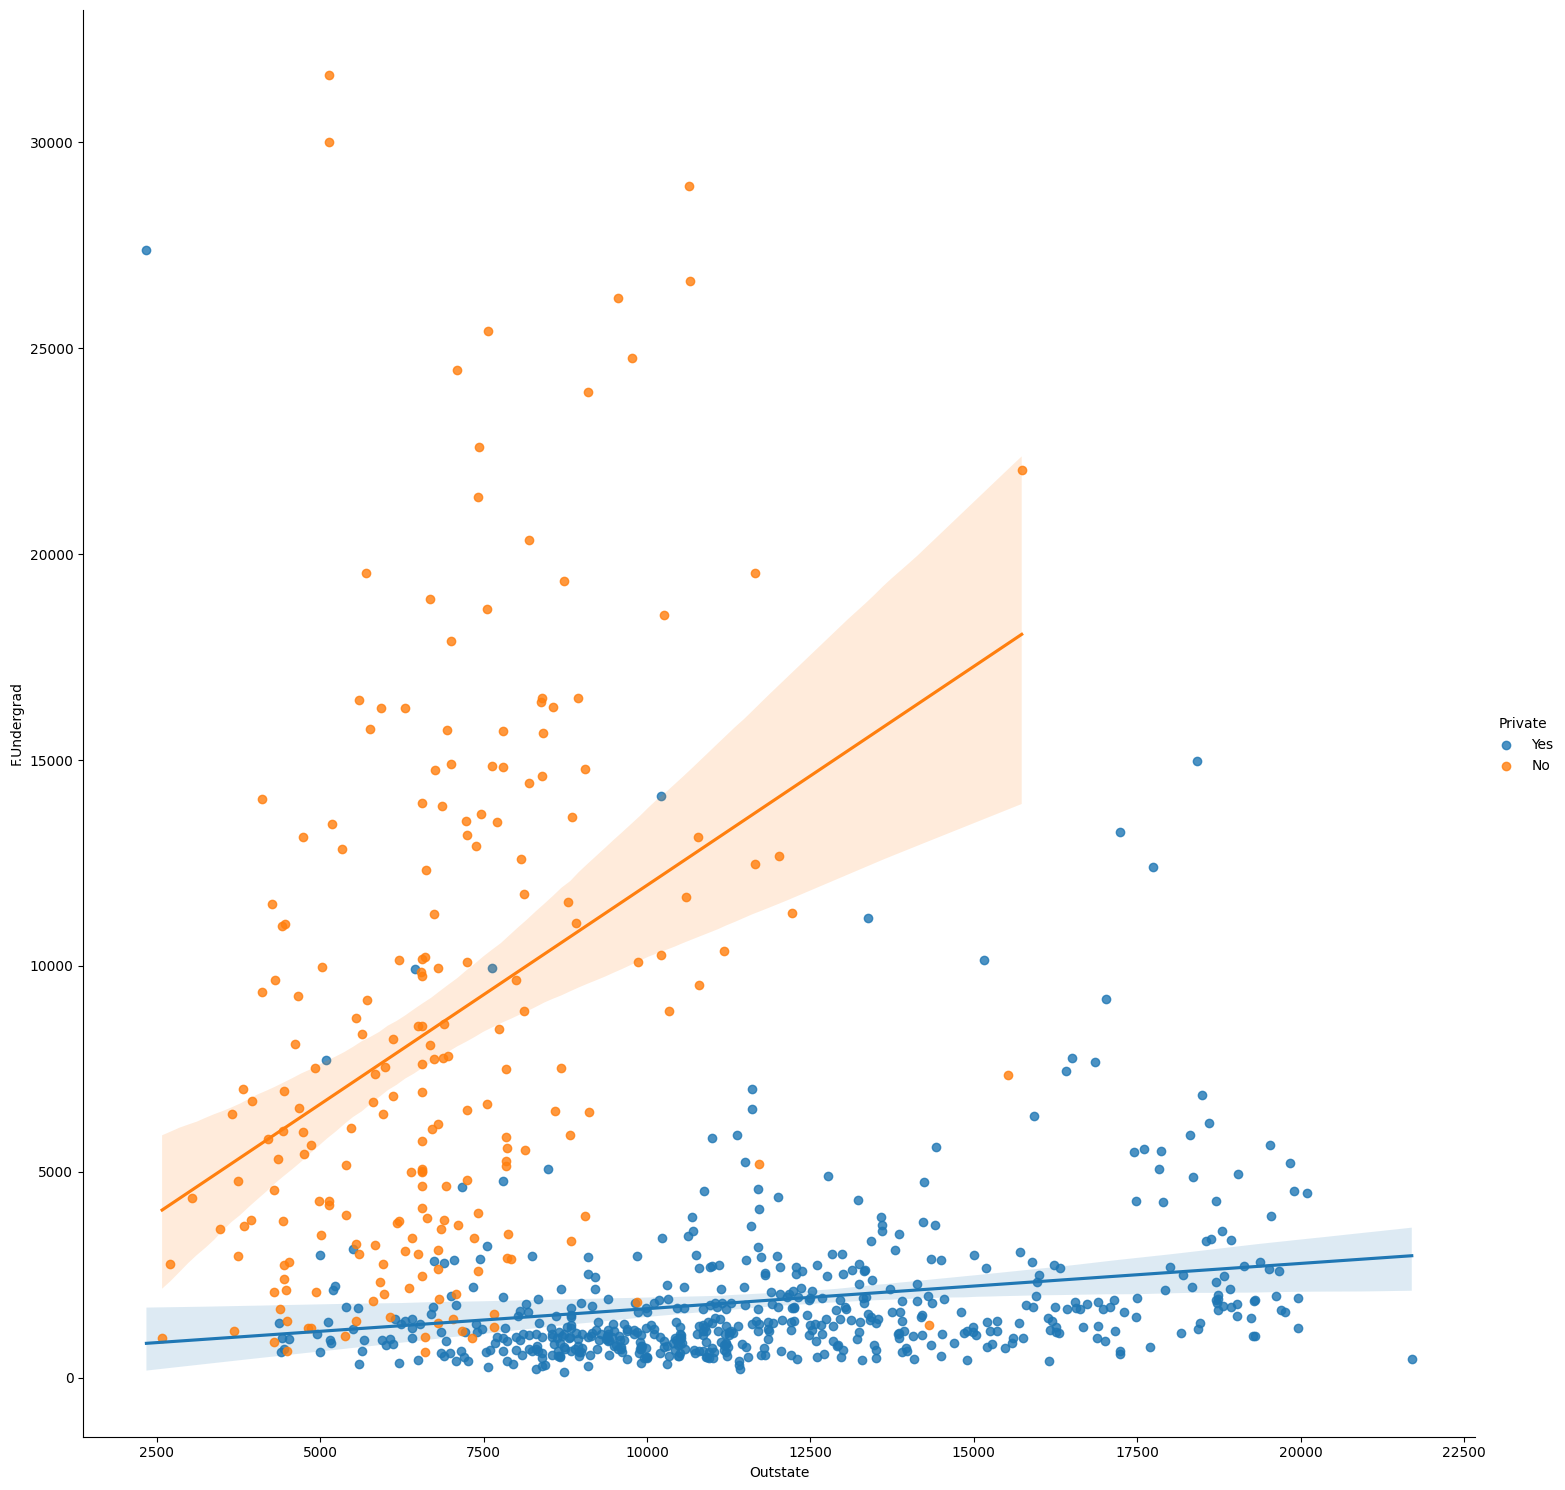

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Outstate", y="F.Undergrad", data=df, hue="Private", height=15)


* As seen in plot above, the number of fulltime undergraduates with Out-of-state tuition are much more higher in state universities(r=0.35 versus 0.19)

* Now below, we will create a stacked histogram showing Out of State Tuition based on whether it is a private university or state university

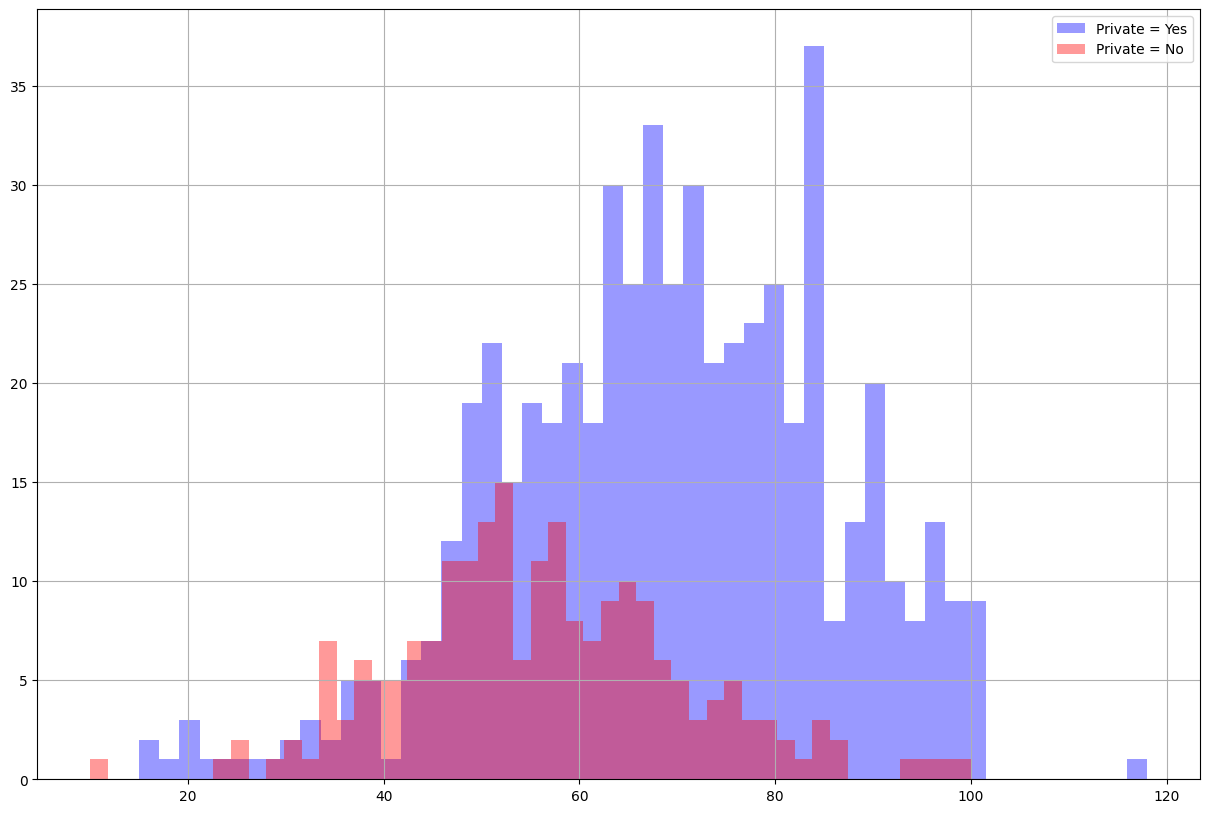

In [39]:
plt.figure(figsize=(15,10))
df[df["Private"] == "Yes"]["Grad.Rate"].hist(color="blue",bins=50,label="Private = Yes",alpha=0.4)
df[df["Private"] == "No"]["Grad.Rate"].hist(color="red",bins=50,label="Private = No",alpha=0.4)
plt.legend()

* Out of tuition for both private and state universities are normally distributed, but it is higher in the private universities than state universities.

* Below we will compare private and state universities in terms of graduation rate by using faced grid

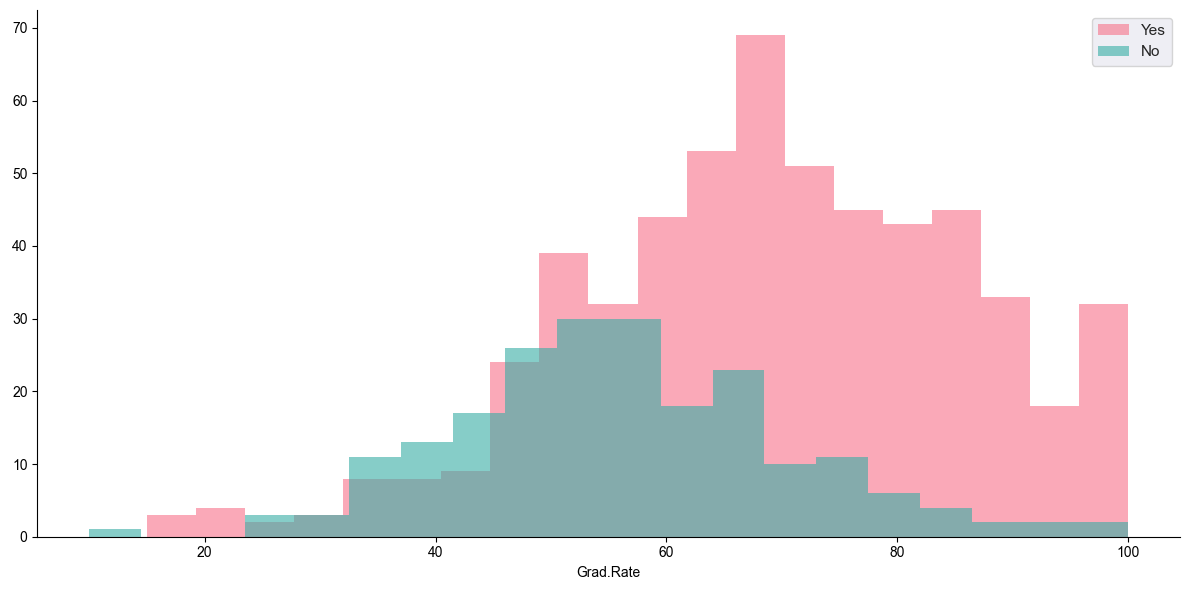

In [45]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2, palette="husl")
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.6)
sns.set()
plt.legend()


* As seen in the plot above, private universities have higher graduation rates than the state universities.

* In the plot above there seems to be a private school with a graduation rate of higher than 100%. Now we will find it

In [ ]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


* We will reassign a new graduation rate for this college.

In [41]:
df["Grad.Rate"]["Cazenovia College"] =100

C:\Users\ITs\AppData\Local\Temp\ipykernel_10832\61459063.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Grad.Rate"]["Cazenovia College"] =100
C:\Users\ITs\AppData\Local\Temp\ipykernel_10832\61459063.py:1: SettingWithCopyWarning: 
A 

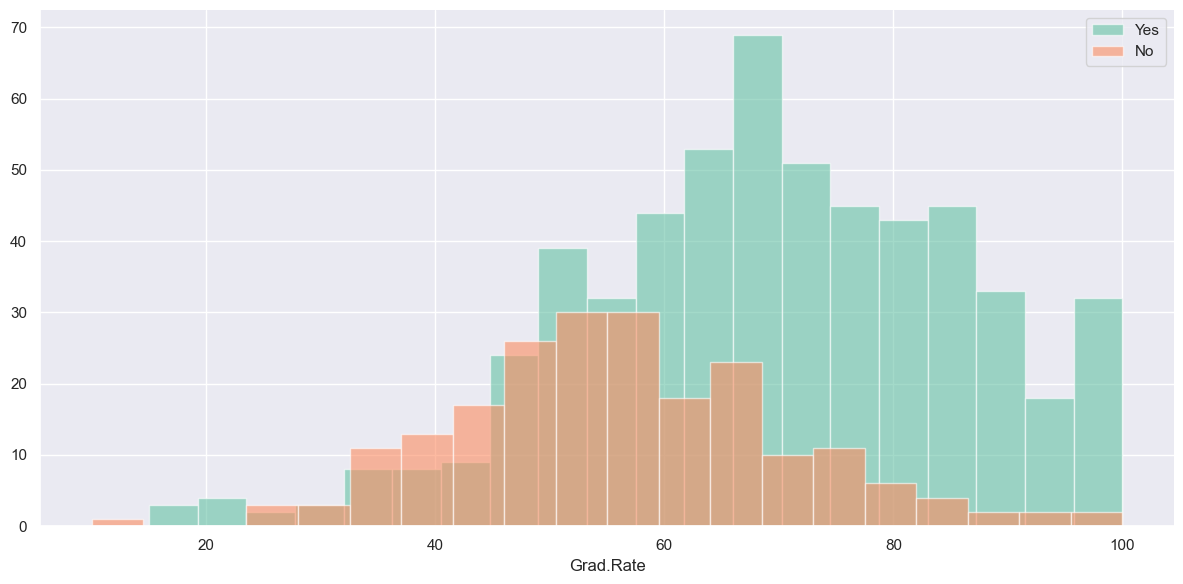

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

g = sns.FacetGrid(df, hue="Private", height=6, aspect=2, palette="Set2")
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.6)

plt.legend()


* We have the same plot with the reassigned graduation rate. Now the highest graduation rate is now higher than %100.

## 3. General Information About K Means Clustering Algorithm:

*This algorithm allows us to cluster and label data as an unsupervised machine learning algorithm

*We apply this algorithm for unlabeled data and it attempts to group similar clusters in unlabeled data.

* Types of clustering problems that we can apply this algorithm is:

    -Clustering Similar Documents
    -Cluster Customers based on their Features
    -Market Segmentation
    -Identify Similar Physical Groups

* The overall goal is to divide data into distinct groups such that observations within each group are similar

## 4. How does the algorithm work:

* The algorithm

        -Choose a number of Clusters K
        -Randomly assign each point to a specific cluster
        -Until clusters stop changing, repeat the following steps:
        -For each cluster, compute the cluster's centroid by taking the mean vector points in the cluster
        -Assign each data point to the cluster for which the centroid is the closest

* Here is the visualization how the algorithm works:

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ITs\AppData\Local\Temp\ipykernel_10832\696010071.py:2: SyntaxWarning: invalid escape sequence '\D'
  url="D:\DOWNLOADS\Flutter\dataset.jpg"


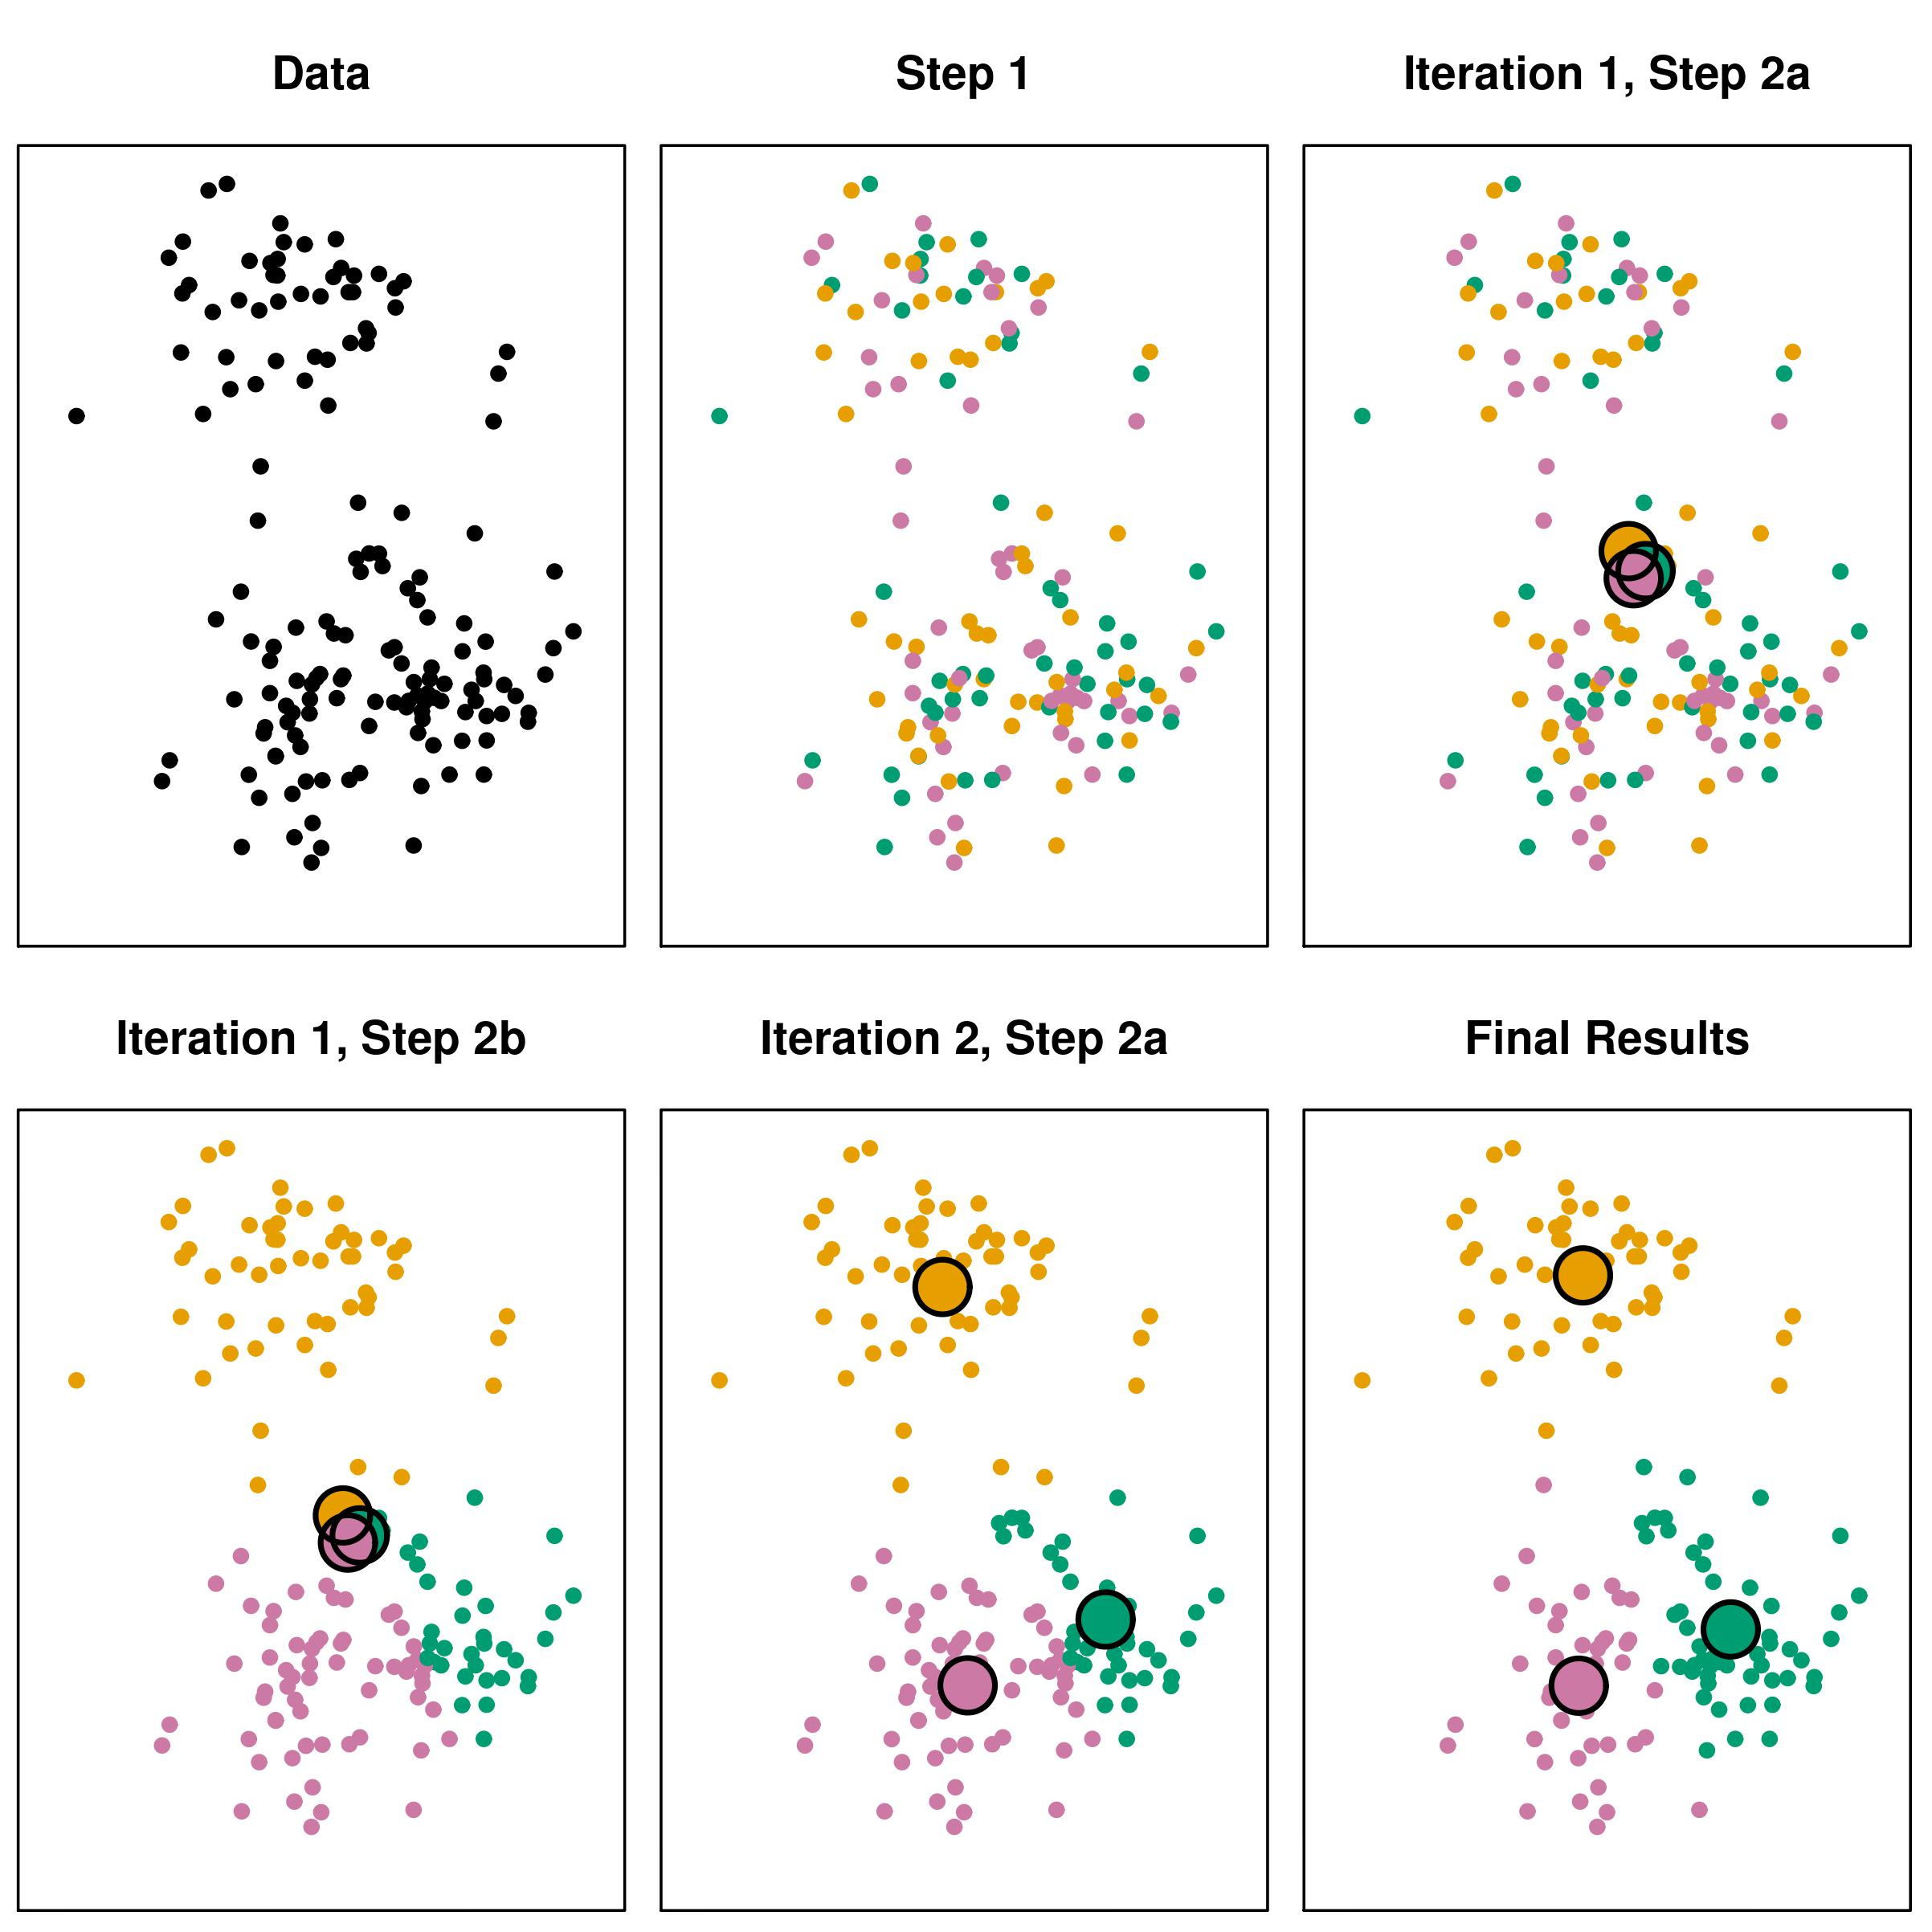

In [50]:
from IPython.display import Image
url="D:\DOWNLOADS\Flutter\dataset.jpg"
Image(url,width=800, height=800)

The first observation about data is shown in top-left of the figure above.

In the step 1 in the algorithm, each observation is randomly assigned to a cluster.

In the step 2a in the algorithm,the cluster centroid for each cluster is computed, which are shown as large colored disk as shown top-right of the figure.

Initially these centroids are almost overlapping as we can see from the figure because initial cluster assignments are chosen randomly.

In the step 2a in the algorithm(bottom-left of the figure above), each observation is assigned to the neares centroid.

In bottom-center of the figure above, step 2a once again is performed which lead to new cluster centroids.

We basically keep repeating these steps until there is no new cluster which means data points are being reassigned to a new cluster centroid.

At the bottom-right, we have the results obtained after about 10 iterations

* How to choose a K Value for the Algorithm:

To perform K Mean Clustering, we have to decide how many clusters we expect in the data.

There is no easy answer for choosing a best K Value, but we can use elbow method to achieve a good K Value for the algorithm.

The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

First of all, we compute the sum of squared errors(SSE) for some values of K(example, 2,3,4,6,etc).The SSE is the sum of squared distance between each member of the cluster and its centroid.

If we plot K value against the SSE,the error decreases as the K Value increases because if the number of cluster increases, they should be smaller. Accordingly the distortion becomes also smaller.

From this perspective, the idea of using elbow method is to choose K Value at which SSE decreases abruptly, and this produces an elbow effect as we can see in the following picture.

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ITs\AppData\Local\Temp\ipykernel_10832\3083755496.py:1: SyntaxWarning: invalid escape sequence '\D'
  url="D:\DOWNLOADS\Flutter\cluster.png"


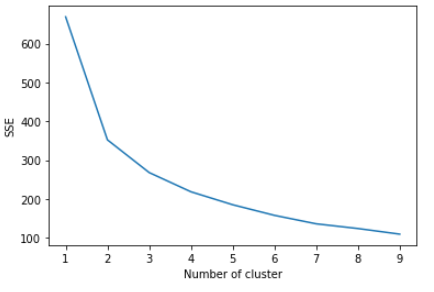

In [51]:
url="D:\DOWNLOADS\Flutter\cluster.png"
Image(url,width=800, height=800)

In the plot above, we see the number of cluster on the x-axis and within group sum of squares.

We try to choose a K Value where we won't get much information by increasing the number of classes, which means that we will not significantly within groups sum of squares by increase the number of clusters.

The number 2 or 3 is the most ideal in this plot because it is the first point the elbow shape happens and avoid to increase the number clusters more.

## 5. Implementing K Means Clustering and Evaluation the Performance of the Algorithm:

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans=KMeans(n_clusters=2)
#here we reate an instance of a K Means model with 2 clusters.

In [54]:
kmeans.fit(df.drop("Private",axis=1))
#we fit the model to all the data except for the Private labelwhich is the target of the data

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [55]:
kmeans.cluster_centers_
# Here are the cluster center vectors

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [56]:
kmeans.labels_
#Here the algorithm separate the variable into two groups without knowing they are private or state universities.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

* Now we will evalute the performance of the algorithm, in normal situation we will not have the chance to evaluate the performance because we will not have the labels beforehand in many cases. But in this tutorial we have the labels and thus can compare the results with the actual labels.

* Before comparing them we need to create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school. We have to tranform the categorical values into numeric ones.

In [57]:
def converter(private):
    if private == "Yes":
        return 1
    else:
        return 0

In [58]:
df["Cluster"]=df["Private"].apply(converter)
# here we apply our function and create a new column with numerical values as 0's and 1's.

In [59]:
df.head()
#Now our target variable is ready for comparison 

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df["Cluster"],kmeans.labels_))
print(4*"\n")
print(classification_report(df["Cluster"],kmeans.labels_))

[[138  74]
 [531  34]]





              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [61]:
import joblib

# Trained model ko save karo
joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']

* Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups